In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv('./archive/Sample - Superstore.csv',encoding_errors='ignore')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
# filling null values
df['Postal Code'].fillna(0,inplace=True)

In [15]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int32  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [17]:
# Checking info duplicates
if df.duplicated().sum() > 0:
    print('Duplicates exist')
else:
    print('No Duplicates Found')

No Duplicates Found


In [23]:
# types of customers
type_of_customers = df['Segment'].unique()
type_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [30]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Type of Customer'})
number_of_customers

,Type of Customer,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


([<matplotlib.patches.Wedge at 0x225fec843d0>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.9%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.2%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.8%')])

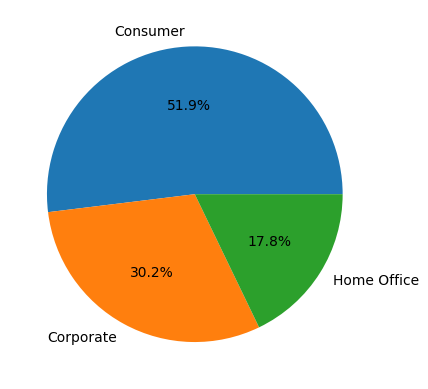

In [40]:
plt.pie(number_of_customers['count'],labels=number_of_customers['Type of Customer'],autopct='%1.1f%%')

In [42]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment':'Type of Customer',
                                                      'Sales':'Total Sales'})
sales_per_segment

,Type of Customer,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


<BarContainer object of 3 artists>

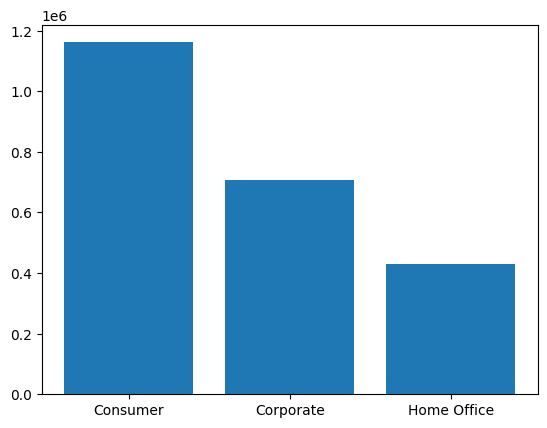

In [43]:
plt.bar(sales_per_segment['Type of Customer'],sales_per_segment['Total Sales'])

([<matplotlib.patches.Wedge at 0x225fed8ce90>,
 [Text(-0.019255774590196492, 1.0998314485160587, 'Consumer'),
  Text(-0.5936661576864369, -0.9260456215639825, 'Corporate'),
  Text(0.9155113363994682, -0.609786022243918, 'Home Office')],
 [Text(-0.010503149776470813, 0.599908062826941, '50.6%'),
  Text(-0.3238179041926019, -0.5051157935803541, '30.7%'),
  Text(0.4993698198542553, -0.33261055758759156, '18.7%')])

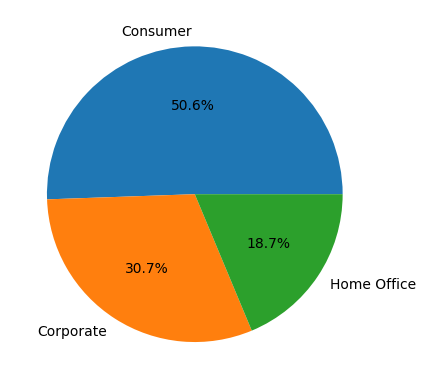

In [45]:
plt.pie(sales_per_segment['Total Sales'],labels=sales_per_segment['Type of Customer'],autopct='%1.1f%%')

In [46]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [64]:
customers_order_frequency =df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customers_order_frequency

,Customer ID,Customer Name,Segment,Order ID
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [65]:
customers_order_frequency=customers_order_frequency.rename(columns={'Order ID':'Total Orders'})
customers_order_frequency

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [69]:
repeat_customers_sorted = customers_order_frequency.sort_values(by='Total Orders',ascending=False)
print(repeat_customers_sorted.reset_index().head(5))

   index Customer ID  Customer Name      Segment  Total Orders
0    787    WB-21850  William Brown     Consumer            37
1    606    PP-18955     Paul Prost  Home Office            34
2    387    JL-15835       John Lee     Consumer            34
3    482    MA-17560   Matt Abelman  Home Office            34
4    720    SV-20365    Seth Vernon     Consumer            32


In [71]:
customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
customer_sales

,Customer ID,Customer Name,Segment,Sales
0,AA-10315,Alex Avila,Consumer,5563.560
1,AA-10375,Allen Armold,Consumer,1056.390
2,AA-10480,Andrew Allen,Consumer,1790.512
3,AA-10645,Anna Andreadi,Consumer,5086.935
4,AB-10015,Aaron Bergman,Consumer,886.156
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,2374.658
789,YC-21895,Yoseph Carroll,Corporate,5454.350
790,YS-21880,Yana Sorensen,Corporate,6720.444
791,ZC-21910,Zuschuss Carroll,Consumer,8025.707


In [73]:
customer_sales = customer_sales.sort_values(by='Sales',ascending=False).reset_index().head(12)
customer_sales

,index,Customer ID,Customer Name,Segment,Sales
0,700,SM-20320,Sean Miller,Home Office,25043.050
1,741,TC-20980,Tamara Chand,Corporate,19052.218
2,621,RB-19360,Raymond Buch,Consumer,15117.339
3,730,TA-21385,Tom Ashbrook,Home Office,14595.620
4,6,AB-10105,Adrian Barton,Consumer,14473.571
5,434,KL-16645,Ken Lonsdale,Consumer,14175.229
6,669,SC-20095,Sanjit Chand,Consumer,14142.334
7,327,HL-15040,Hunter Lopez,Consumer,12873.298
8,683,SE-20110,Sanjit Engle,Consumer,12209.438
9,131,CC-12370,Christopher Conant,Consumer,12129.072
